In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Otimização Unidimensional

## Exemplo

\begin{equation}
    \min f(\mathbf{x}) = 2x_1^2 + x_2^2
\end{equation}

Pressuponha que você esteja no ponto $\mathbf{x_0} = [1, 1]$ e a direção minimizante $\mathbf{d} = - \nabla f(\mathbf{x_0}) = [-4, -2]$. 

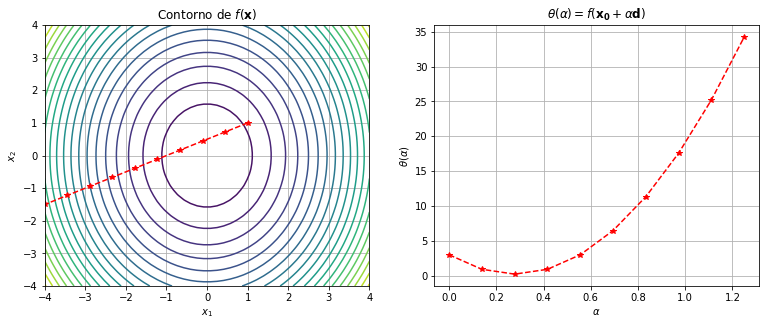

In [2]:
# Definição da malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(-4, 4, 50),
                     np.linspace(-4, 4, 50))

# Cálculo da função
f = 2*x1**2 + x2**2

# Definição da função objetivo para futuras avaliações
def objfun(x):
    return 2*x[0]**2 + x[1]**2

# Dados do exemplo
x0 = np.array([1., 1.]) # Ponto inicial
d = np.array([-4., -2.]) # Direção de busca

# Cálculo da função theta(alpha) apenas para fins gráficos
alpha = np.linspace(0, 1.25, 10)
u = np.zeros((alpha.size, 2))
theta = np.zeros(alpha.size)
for n in range(alpha.size):
    u[n, :] = x0 + alpha[n]*d
    theta[n] = objfun(u[n, :])

_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])

# Gráfico de contorno
axis[0].contour(x1, x2, f, levels=20)
axis[0].plot(u[:, 0], u[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title(r'Contorno de $f(\mathbf{x})$')
axis[0].grid()

# Gráfico de theta(alpha)
axis[1].plot(alpha, theta, '--*r')
axis[1].set_xlabel(r'$\alpha$')
axis[1].set_ylabel(r'$\theta(\alpha)$')
axis[1].set_title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
axis[1].grid()

plt.show()

## Métodos de Eliminação de Intervalos

### Busca Irrestrita

Neste método, a partir de um ponto inicial, eu vou dando passos fixos na direção de minimização até encontrar um ponto onde eu volto a aumentar minha função-objetivo. Nesse instante, eu paro e tomo como intervalo que contém o ótimo o ponto em que a função começa a subir e o antepenúltimo ponto.

Avaliacoes: 4


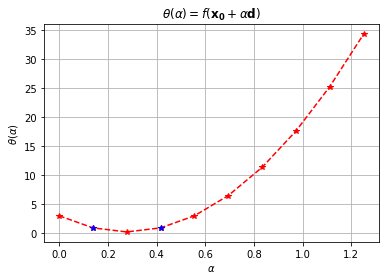

In [3]:
# Função theta(alpha) = f(x + alpha*d)
def t(a):
    x0 = np.array([1., 1.])
    d = np.array([-4., -2.])
    return objfun(x0 + a*d)

def busca_irrestrita1(func, passo):
    
    # Intervalo inicial
    a = 0
    b = passo
    
    # Avaliação do intervalo inicial
    fa = func(a)
    fb = func(b)
    avaliacoes = 2
    
    # Marca o limite inferior anterior
    anterior = 0
    
    # Enquanto eu estiver descendo
    while fb < fa:
        
        # Salvo o valor do limite inferior anterior
        anterior = a
        
        # Novo limite inferior é o atual limite máximo
        a = b
        fa = fb
        
        # Dou um passo a frente no intervalo
        b += passo
        fb = func(b)
        avaliacoes += 1
        
    print('Avaliacoes: %d' %avaliacoes)
    
    # Retorno o intervalo final
    return anterior, b

a, b = busca_irrestrita1(t, 1.25/9)
fa = t(a)
fb = t(b)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Melhoramentos no método

Uma possível melhora é acelerar o passo a cada iteração. Deste modo eu posso evitar que eu fique andando durante muito tempo uma descida que é muito suave.

Avaliacoes: 3


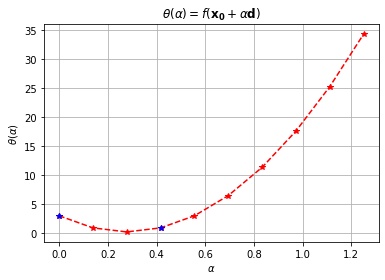

In [4]:
def busca_irrestrita2(func, passo, aceleracao=1.5):
    
    # Intervalo inicial
    a = 0
    b = passo
    
    # Avaliação do intervalo inicial
    fa = func(a)
    fb = func(b)
    avaliacoes = 2
    
    # Marca o limite inferior anterior
    anterior = 0
    
    # Enquanto eu estiver descendo
    while fb < fa:
        
        # Salvo o valor do limite inferior anterior
        anterior = a
        
        # Novo limite inferior é o atual limite máximo
        a = b
        fa = fb
        
        # Acelero o passo
        passo = passo*aceleracao
        
        # Dou um passo a frente no intervalo
        b += passo
        fb = func(b)
        avaliacoes += 1
        
    print('Avaliacoes: %d' %avaliacoes)
        
    # Retorno o intervalo final
    return anterior, b

a, b = busca_irrestrita2(t, 1.25/9, aceleracao=2.)
fa = t(a)
fb = t(b)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Busca exaustiva

Dado um intervalo que contenha o ótimo:
1. Crie uma malha de pontos igualmente espaçados.
2. Encontre aquele com menor avaliação.
3. Escolha como novo intervalo os vizinhos da direita e da esquerda.
4. Repita o processo.

Número de avaliações: 48


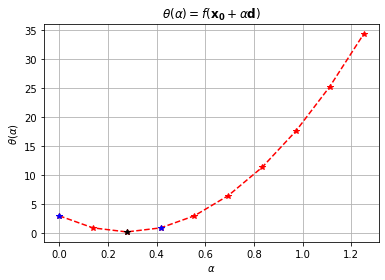

In [5]:
def busca_exaustiva(func, a, fa, b, fb, precisao, npontos):

    # Contador de avaliações
    navaliacoes = 0
    
    # Enquanto o meu intervalo não for reduzido
    # a um tamanho suficientemente pequeno
    while (b-a) > precisao:
        
        # Divide o intervalo em npontos equidistantes
        x = np.linspace(a, b, npontos)
        
        # Vetor que vai carregar a avaliação de cada ponto
        fx = np.zeros(x.size)
        
        # O primeiro e o último pontos são a e b
        fx[0] = fa
        fx[-1] = fb
        
        # Avalia todos os outros pontos
        for n in range(1, npontos-1):
            fx[n] = func(x[n])
            navaliacoes += 1
            
        # Acha quem é o menor
        n = np.argmin(fx)
        
        # O novo limite inferior é o ponto anterior do menor
        a = x[n-1]
        fa = fx[n-1]

        # O novo limite superior é o ponto anterior do menor
        b = x[n+1]
        fb = fx[n+1]
    
    print('Número de avaliações: %d' %navaliacoes)
    
    # A aproximação do meu ótimo é o meio do meu intervalo
    return (a+b)/2

precisao = 1e-4
alpha_opt = busca_exaustiva(t, a, fa, b, fb, precisao, 10)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Busca dicotômica

O método divide repetidamente o intervalo em dois subintervalos e avalia a função em dois pontos intermediários. Com base nas avaliações, ele descarta o subintervalo que não contém o mínimo (ou máximo) e concentra a busca no subintervalo mais promissor (dependendo da parametrização, pode excluir 25% do intervalo em cada iteração). Esse processo é repetido até que um critério de parada seja atendido, fornecendo uma estimativa precisa do mínimo (ou máximo) da função. O método é eficiente e geralmente requer menos avaliações da função do que a busca exaustiva.

Número de avaliações: 36


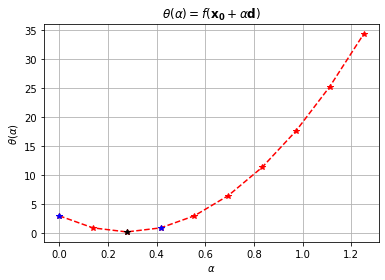

In [6]:
def busca_dicotomica(func, a, fa, b, fb, precisao):

    # Contador de avaliações
    navaliacoes = 0
    
    # Enquanto o meu intervalo não for reduzido
    # a um tamanho suficientemente pequeno
    while (b-a) > precisao:
        
        # Calcula o comprimento do intervalo
        L = b-a
        
        # Calcula o valor de delta
        delta = .25*L
        
        # Determina os dois pontos intermediarios
        u = a + L/2-delta/2
        v = a + L/2+delta/2
        fu = func(u)
        fv = func(v)
        navaliacoes += 2
        
        # Se fv for maior que fu, então v é o novo b
        if fu < fv:
            b = v
            fb = fv
            
        # Se fu for maior que fv, então u é o novo a
        else:
            a = u
            fa = fu

    print('Número de avaliações: %d' %navaliacoes)
    
    # A aproximação do meu ótimo é o meio do meu intervalo
    return (a+b)/2

alpha_opt = busca_dicotomica(t, a, fa, b, fb, precisao)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Método da bisseção

O método divide repetidamente um intervalo em duas partes iguais e avalia a função nos 3 pontos médios (do intervalo original e de cada subintervalo). Com base nas avaliações, ele descarta o subintervalo que não contém o mínimo da função e continua a dividir mantendo a informação do ponto médio e avaliar até atingir um critério de parada, encontrando uma estimativa precisa do mínimo da função. Ele sempre exclui **metade** do intervalo a cada iteração. 

Número de avaliações: 27


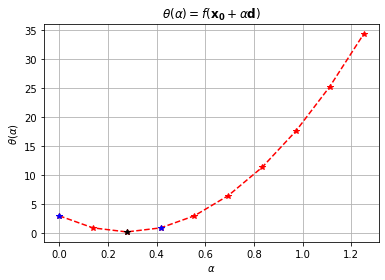

In [7]:
def busca_bissecao(func, a, fa, b, fb, precisao):

    # Calcula e avalia o ponto no meio do intervalo
    c = (a+b)/2
    fc = func(c)
    navaliacoes = 1
    
    # Enquanto o meu intervalo não for reduzido
    # a um tamanho suficientemente pequeno
    while (b-a) > precisao:
        
        # Calcula o comprimento do intervalo
        L = b-a
        
        # Ponto médio entre a e c
        u = a + L/4
        
        # Ponto médio entre c e b
        v = a + L*3/4
        
        # Avaliações
        fu = func(u)
        fv = func(v)
        navaliacoes += 2
        
        # Se fu é o menor, então excluímos o intervalo (c, b)
        if fu < fc and fc < fv:
            b, fb = c, fc
            c, fc = u, fu

        # Se fv é o menor, então excluímos o intervalo (a, c)
        elif fu > fc and fc > fv:
            a, fa = c, fc
            c, fc = v, fv
        
        # Se fc é o menor, então excluímos os intervalos (a, u) e (v, c)
        elif fu > fc and fv > fc:
            a, fa = u, fu
            b, fb = v, fv

    print('Número de avaliações: %d' %navaliacoes)
    
    # A aproximação do meu ótimo é o meio do meu intervalo
    return (a+b)/2

alpha_opt = busca_bissecao(t, a, fa, b, fb, precisao)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Método de Fibonacci

O método usa a sequência de números de Fibonacci para encontrar o mínimo de uma função em um intervalo. Ele divide o intervalo em três subintervalos usando a proporção de Fibonacci (razão entre dois números na sequência), avaliando a função em dois pontos específicos. Com base nas avaliações, ele ajusta o intervalo e continua a divisão até atingir um critério de parada. 

Número de avaliações: 20
Precisao: 0.000072


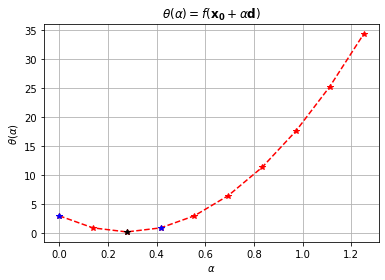

In [8]:
# Função que calcula o n-ésimo termo de Fibonacci
def fibonacci(N):
    if N == 0 or N == 1:
        return 1.
    fm1, fm2 = 1., 1.
    for n in range(2, N+1):
        f = fm1 + fm2
        fm2 = fm1
        fm1 = f
    return f

def busca_fibonacci(func, a, fa, b, fb, precisao, niteracoes):

    # Contador de termos de Fibonacci
    k = 1
    
    # Calcula o comprimento do intervalo
    L = b-a
    
    # Calcula o último e o penúltimo termo de Fibonacci
    Fnk = fibonacci(niteracoes-k)
    Fn = fibonacci(niteracoes)
    
    # Determina dois pontos médios
    u = b - Fnk/Fn*L
    v = a + Fnk/Fn*L
    
    # Avalia
    fu = func(u)
    fv = func(v)
    navaliacoes = 2
    
    # O novo último termo vai ser o penúltimo
    Fn = Fnk
    
    # Avança para o próximo termo
    k += 1
    
    # Enquanto não acabar a série ou o meu
    # intervalo não for reduzido
    # a um tamanho suficientemente pequeno
    while k <= niteracoes and (b-a) > precisao:
        
        # Calcula novo penúltimo termo
        Fnk = fibonacci(niteracoes-k)
        
        # Exclui intervalo (v, c)
        if fu < fv:
            b, fb = v, fv
            v, fv = u, fu
            L = b-a
            u = b - Fnk/Fn*L
            fu = func(u)
        
        # Exclui intervalo (a, u)
        else:
            a, fa = u, fu
            u, fu = v, fv
            L = b-a
            v = a + Fnk/Fn*L
            fv = func(v)
        
        navaliacoes += 1
        
        # O novo último termo vai ser o penúltimo
        Fn = Fnk
        
        # Avança para o próximo termo
        k += 1

    print('Número de avaliações: %d' %navaliacoes)
    print('Precisao: %f' % (b-a))
    
    # A aproximação do meu ótimo é o meio do meu intervalo
    return (a+b)/2

alpha_opt = busca_fibonacci(t, a, fa, b, fb, precisao, 50)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

### Método da Seção Áurea

O método utiliza a proporção áurea para dividir um intervalo em busca do mínimo de uma função. Ele avalia a função em dois pontos específicos baseados nessa proporção. Com base nas avaliações, ajusta o intervalo e continua a divisão até atender a um critério de parada, fornecendo uma estimativa precisa do mínimo da função. É uma abordagem eficiente e é usada em vez de métodos mais simples, como a bisseção, para convergir mais rapidamente.

Número de avaliações: 20


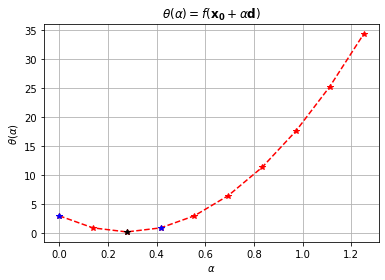

In [9]:
def busca_aurea(func, a, fa, b, fb, precisao):

    # Calcula o comprimento do intervalo
    L = b-a
    
    # Determina dois pontos médios
    u = b - .618*L
    v = a + .618*L
    
    # Avalia
    fu = func(u)
    fv = func(v)
    navaliacoes = 2

    # Enquanto o meu intervalo não for reduzido
    # a um tamanho suficientemente pequeno
    while (b-a) > precisao:        
        
        if fu < fv:
            
            # Exclui o intervalo (v, b)
            b, fb = v, fv
            
            # Atualiza o novo comprimento do intervalo
            L = b-a
            
            # Faz de u o novo v
            v, fv = u, fu
            
            # Calcula o novo u
            u = b -.618*L
            fu = func(u)
        
        # Se fu > fv
        else:
            
            # Exclui o intervalo (a, u)
            a, fa = u, fu
            
            # Atualiza o novo comprimento do intervalo
            L = b-a
            
            # Faz de v o novo u
            u, fu = v, fv
            
            # Calcula o novo u
            v = a + .618*L
            fv = func(v)
        
        navaliacoes += 1

    print('Número de avaliações: %d' %navaliacoes)
    
    # A aproximação do meu ótimo é o meio do meu intervalo
    return (a+b)/2

alpha_opt = busca_aurea(t, a, fa, b, fb, precisao)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

A seção áurea é o limite da razão entre dois números consecutivos na sequência de Fibonacci quando os mesmo começam a ficar grandes.

In [10]:
for i in range(5,15):
    print(fibonacci(i-1)/fibonacci(i))

0.625
0.6153846153846154
0.6190476190476191
0.6176470588235294
0.6181818181818182
0.6179775280898876
0.6180555555555556
0.6180257510729614
0.6180371352785146
0.6180327868852459


## Métodos de interpolação

### Método da interpolação quadrática

O método ajusta uma parábola aos pontos iniciais de avaliação da função. Com base nessa parábola, ele estima o mínimo e usa essa estimativa para atualizar a região de busca. Isso permite uma convergência mais rápida em comparação com métodos de busca simples, como a bisseção. Se a função for quadrática, então o método converge em uma iteração.

Número de avaliações: 3


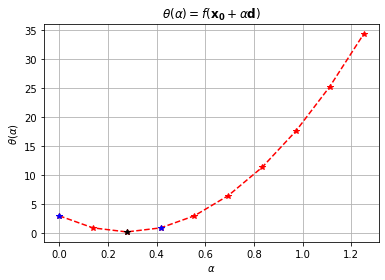

In [11]:
def interp_quad(func, f0, precisao, passo):

    # O ponto inicial é sempre zero
    A, fA = 0., f0
    
    # O ponto do meio é um passo
    B, fB = passo, func(passo)
    
    # O terceiro são dois passos
    C, fC = 2*passo, func(2*passo)
    navaliacoes = 2
    
    # Termos do polinômio equivalente: a + b*x + c*x^2
    a = (fA*B*C*(C-B) + fB*C*A*(A-C) + fC*A*B*(B-A))/((A-B)*(B-C)*(C-A))
    b = (fA*(B*B-C*C) + fB*(C*C-A*A) + fC*(A*A-B*B))/((A-B)*(B-C)*(C-A))
    c = - (fA*(B-C) + fB*(C-A) + fC*(A-B))/((A-B)*(B-C)*(C-A))
    
    # Ponto de ótimo do polinômio aproximado
    xopt = -b/2/c
    fopt = func(xopt)
    navaliacoes += 1
    
    # Enquanto a avaliação do mínimo do polinônimo aproximado
    # não for suficientemente igual ao f(x)
    while np.abs((a+b*xopt+c*xopt**2 - fopt)/fopt) > precisao:
        
        # Atualização dos três pontos de interpolação
        if xopt > B and fopt < fB:
            A, fA = B, fB
            B, fB = xopt, fopt
        elif xopt > B and fopt > fB:
            C, fC = xopt, fopt
        elif xopt < B and fopt < fB:
            C, fC = B, fB
            B, fB = xopt, fopt
        elif xopt < B and fopt > fB:
            A, fA = xopt, fopt
    
        # Novos termos do polinômio equivalente: a + b*x + c*x^2
        a = (fA*B*C*(C-B) + fB*C*A*(A-C) + fC*A*B*(B-A))/((A-B)*(B-C)*(C-A))
        b = (fA*(B*B-C*C) + fB*(C*C-A*A) + fC*(A*A-B*B))/((A-B)*(B-C)*(C-A))
        c = - (fA*(B-C) + fB*(C-A) + fC*(A-B))/((A-B)*(B-C)*(C-A))
        
        # Novo ponto de ótimo do polinômio aproximado
        xopt = -b/2/c
        fopt = func(xopt)
        navaliacoes += 1

    print('Número de avaliações: %d' %navaliacoes)    
    return xopt

alpha_opt = interp_quad(t, t(0.), precisao, 1e-4)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

## Método de Quasi-Newton

Seja um ponto $x_i$ e $f(x)$ uma função aproximadamente quadrática, ou seja, a terceira derivada praticamente nula. Utilizando a expansão da Série de Taylor:

\begin{equation}
    f(x) = f(x_i) + f^\prime(x_i)(x-x_i)+ \frac{1}{2}f^{\prime\prime}(x_i)(x-x_i)^2
\end{equation}

O ponto de mínimo é tal que $f^\prime(x) = 0$. Logo, se derivarmos a equação acima e igualarmos a zero (lembrando que numa função quadrática a terceira derivada é zero), obteremos:

\begin{equation}
    f^\prime(x) = f^\prime(x_i) + f^{\prime\prime}(x_i)(x-x_i) = 0
\end{equation}

Logo, podemos rescrever:

\begin{equation}
    x = x_i - \frac{f^\prime(x_i)}{f^{\prime\prime}(x_i)}
\end{equation}

E, assim, obtemos uma expressão para calcularmos um ponto seguinte. Esse é o Método de Newton ou Método de Newton-Raphson. Este método pressupõe o conhecimento da forma fechada das derivadas primeira e segunda.

Quando as derivadas não são conhecidas, então é necessário fazer uma estimativa. Este é o Método Quasi-Newton. Uma fórmula para se estimar a segunda derivada de uma função é:

\begin{equation}
    f^{\prime\prime}(x) \approx \frac{f(x+\Delta) - 2f(x) + f(x-\Delta)}{\Delta^2}
\end{equation}

Já que é necessário avaliar $f(x+\Delta)$ e $f(x-\Delta)$ para calcular a segunda derivada, a primeira derivada pode ser aproximada com melhor precisão por:

\begin{equation}
    f^{\prime}(x) \approx \frac{f(x+\Delta) - f(x-\Delta)}{2\Delta}
\end{equation}

Se a função for, de fato, quadrática, então o método converge em uma iteração.

Número de avaliações: 4


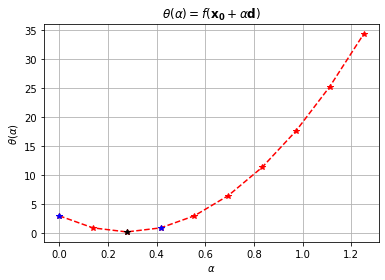

In [12]:
def quasinewton(func, fx0, precisao):

    # Pertubação pequena para estimativa da derivada
    delta = 1e-2
    
    # Ponto inicial
    x, fx = 0., fx0
    
    # Calcula f(x+delta) e f(x-delta)
    fxm = func(x-delta)
    fxp = func(x+delta)
    navaliacoes = 2

    # Estima a primeira derivada
    fp = (fxp-fxm)/(2*delta)
    
    # Estima a segunda derivada
    fpp = (fxp-2*fx+fxm)/(delta**2)
    
    # Enquanto a primeira derivada não for
    # tão próxima de zero
    while np.abs(fp) > precisao:
        
        # Fórmula de Newton
        x = x - fp/fpp
    
        # Recalcula f(x+delta) e f(x-delta) para novo ponto
        fxm = func(x-delta)
        fxp = func(x+delta)
        navaliacoes += 2

        # Estima a primeira derivada
        fp = (fxp-fxm)/(2*delta)
        
        # Estima a segunda derivada
        fpp = (fxp-2*fx+fxm)/(delta**2)

    print('Número de avaliações: %d' %navaliacoes)    
    return x

alpha_opt = quasinewton(t, t(0.), precisao)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()

Para funções que se diferenciem muito de uma função quadrática, o Método de Quasi-Newton pode não convergir.

## Método da Secante

Ao derivarmos a aproximação de segunda ordem da série de Taylor e igualarmos a zero, nós obtemos: 

\begin{equation}
    f^\prime(x) = f^\prime(x_i) + f^{\prime\prime}(x_i)(x-x_i) = 0
\end{equation}

Ao invés termos que calcular a derivada segunda, podemos calcular a inclinação da reta que liga dois pontos na curva da primeira derivada (secante). Ou seja:

\begin{equation}
    s = \frac{f^\prime(B)-f^\prime(A)}{B-A}
\end{equation}

E assim, fazermos:

\begin{equation}
    x = x_i - \frac{f^\prime(x_i)}{s} = A - \frac{f^\prime(A)(B-A)}{f^\prime(B)-f^\prime(A)}
\end{equation}

Os pontos $A$ e $B$ serão dois pontos no qual cercam o intervalo em que a derivada é igual a zero.

Número de avaliações: 14


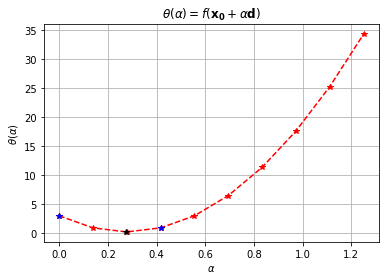

In [13]:
def secante(func, fx0, precisao):

    # Pertubação pequena para estimativa da derivada
    delta = 1e-2
    
    # Ponto inicial
    A, fA = 0, fx0
    
    # Derivada no ponto inicial
    fD = func(delta)
    fpA = (fD-fA)/delta
    
    # Segundo ponto e sua derivada
    t0, fpt0 = delta, (func(2*delta)-fD)/delta
    navaliacoes = 2
    
    # Enquanto a derivada do segundo ponto não estiver acima de zero
    while fpt0 < 0:
        
        # O primeiro ponto é atualizadoå
        A, fpA = t0, fpt0
        
        # É dado um novo passo e calculado a sua derivada
        t0 = 2*t0
        fpt0 = (func(t0+delta)-func(t0))/delta
        navaliacoes += 2

    # O ponto A é um ponto com derivada negativa
    # enquanto o ponto B é um ponto com derivada positiva
    B, fpB = t0, fpt0
    
    while True:
        
        # Atualização de x:
        # O ponto onde a reta que une os dois pontos (secante)
        # toca o zero no eixo-y da derivada
        x = A - (fpA*(B-A))/(fpB-fpA)
        
        # Reavalia a derivada
        fpx = (func(x+delta)-func(x))/delta
        navaliacoes += 2
        
        # Se a derivada for suficientemente
        # próxima de zero
        if np.abs(fpx) <= precisao:
            break
        
        # A derivada está acima de zero,
        # então atualiza B
        if fpx >= 0:
            B, fpB = x, fpx
        
        # A derivada está abaixo de zero,
        # então atualiza B
        else:
            A, fpA = x, fpx

    print('Número de avaliações: %d' %navaliacoes)    
    return x

alpha_opt = secante(t, t(0.), precisao)
fopt = t(alpha_opt)

plt.plot(alpha, theta, '--*r')
plt.plot([a, b], [fa, fb], '*b')
plt.plot(alpha_opt, fopt, '*k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta(\alpha)$')
plt.title(r'$\theta(\alpha) = f(\mathbf{x_0}+\alpha\mathbf{d})$')
plt.grid()